### Evaluation notebook

Evaluates on `HPatches` dataset.

For an R2D2-like model, given that you have run the inference script `relfm/inference/r2d2_on_hpatches.py` that generates outputs, you can run this notebook to test rotation equivariance of local feature matching.

## Table of Contents

* [Imports](#imports)
* [Configure inputs](#configure_inputs)
* [Generate results](#generate_results)
* [Plot results](#plot_results)

> *Warning*: This notebook takes about 9-10 minutes for generating results per model.

### Imports <a class="anchor" id="imports"></a>

Basic imports.
> Note that you should set `PYTHONPATH=/path/to/repo/:/path/to/repo/lib/r2d2/` before running the environment.

In [17]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
import os
from os.path import join, exists, expanduser
from genericpath import isdir
from glob import glob
import numpy as np
from PIL import Image
from collections import defaultdict
import matplotlib.pyplot as plt
import torch

from lib.r2d2.extract import extract_keypoints_modified
from relfm.utils.paths import REPO_PATH
from relfm.utils.log import print_update, tqdm_iterator
from relfm.utils.visualize import show_images_with_keypoints, set_latex_fonts
from relfm.utils.matching import evaluate_matching_with_rotation, analyze_result
from relfm.inference.r2d2_on_hpatches import configure_save_dir

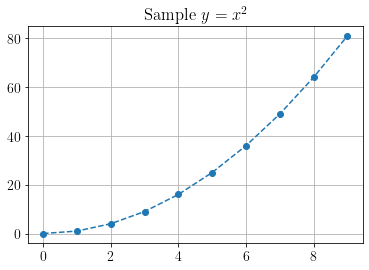

In [19]:
set_latex_fonts(show_sample=True)

### Configure inputs <a class="anchor" id="configure_inputs"></a>

Set the correct data and output paths as well as the model checkpoint that you'd like to evaluate on. Parameters such as `gap_between_rotations` and `imsize` (size of downsized image to evaluate) are hard-coded to be the same as the default values in the inference script.

In [20]:
data_dir = join(REPO_PATH, "data/hpatches-sequences-release/")

model_ckpt_paths = {
    "R2D2": join(REPO_PATH, "checkpoints/r2d2_WASF_N16.pt"),
    "R2D2 - $C_{4}$ (Ep 4)": join(REPO_PATH, "trained_models/epoch_16_test_model.pt"),
#     "R2D2 - $SO_{2}$ (Ep 0)": join(REPO_PATH, "trained_models/epoch_0_SO2_downsamp_4x16_2x32_1x64_1x128.pt")
    "R2D2 - $SO_{2}$ (Ep 4)": join(REPO_PATH, "trained_models/epoch_3_SO2_4x16_1x32_1x64_2x128.pt"),
    "R2D2 - $C_{8}$ (Ep 4)": join(REPO_PATH, "trained_models/epoch_3_C8_4x16_1x32_1x64_2x128.pt"),
    "R2D2 - $SO_{2}$ (Ep 18)": join(REPO_PATH, "trained_models/epoch_17_SO2_4x16_1x32_1x64_2x128.pt")
}
# model_ckpt_path = join(REPO_PATH, "checkpoints/r2d2_WASF_N16.pt")
# model_ckpt_path = join(REPO_PATH, "trained_models/epoch_16_test_model.pt")

output_dir = join(expanduser("~"), "outputs/rotation-equivariant-lfm")

In [21]:
assert isdir(data_dir)
assert isdir(output_dir)
# assert exists(model_ckpt_path)

gap_between_rotations=15
downsize=True
imsize=300

### Generate results <a class="anchor" id="generate_results"></a>

Generating qualitative results for i_duda 	::   0%|          | 0/125 [00:00<?, ?it/s]

::::: Generating results for R2D2 for sequence /home/lcur1325/projects/rotation-equivariant-lfm/data/hpatches-sequences-release/i_duda :::::
Image 2 with rotation 0


Generating qualitative results for i_duda 	::   2%|▏         | 3/125 [00:00<00:05, 21.12it/s]

Image 2 with rotation 15
Image 2 with rotation 30
Image 2 with rotation 45
Image 2 with rotation 60


Generating qualitative results for i_duda 	::   5%|▍         | 6/125 [00:00<00:09, 12.62it/s]

Image 2 with rotation 75
Image 2 with rotation 90
Image 2 with rotation 105
Image 2 with rotation 120
Image 2 with rotation 135

Generating qualitative results for i_duda 	::   8%|▊         | 10/125 [00:00<00:05, 19.60it/s]


Image 2 with rotation 150
Image 2 with rotation 165
Image 2 with rotation 180


Generating qualitative results for i_duda 	::  10%|█         | 13/125 [00:00<00:06, 17.07it/s]

Image 2 with rotation 195
Image 2 with rotation 210
Image 2 with rotation 225


Generating qualitative results for i_duda 	::  14%|█▍        | 18/125 [00:01<00:08, 12.85it/s]

Image 2 with rotation 240
Image 2 with rotation 255
Image 2 with rotation 270


Generating qualitative results for i_duda 	::  17%|█▋        | 21/125 [00:01<00:07, 13.59it/s]

Image 2 with rotation 285
Image 2 with rotation 300
Image 2 with rotation 315
Image 2 with rotation 330


Generating qualitative results for i_duda 	::  19%|█▉        | 24/125 [00:01<00:06, 16.55it/s]

Image 2 with rotation 345
Image 2 with rotation 360
Image 3 with rotation 0


Generating qualitative results for i_duda 	::  22%|██▏       | 28/125 [00:01<00:07, 13.21it/s]

Image 3 with rotation 15
Image 3 with rotation 30
Image 3 with rotation 45
Image 3 with rotation 60


Generating qualitative results for i_duda 	::  28%|██▊       | 35/125 [00:02<00:04, 19.05it/s]

Image 3 with rotation 75
Image 3 with rotation 90
Image 3 with rotation 105
Image 3 with rotation 120
Image 3 with rotation 135
Image 3 with rotation 150
Image 3 with rotation 165


Generating qualitative results for i_duda 	::  34%|███▎      | 42/125 [00:02<00:03, 24.94it/s]

Image 3 with rotation 180
Image 3 with rotation 195
Image 3 with rotation 210
Image 3 with rotation 225
Image 3 with rotation 240
Image 3 with rotation 255
Image 3 with rotation 270


Generating qualitative results for i_duda 	::  40%|████      | 50/125 [00:02<00:02, 30.79it/s]

Image 3 with rotation 285
Image 3 with rotation 300
Image 3 with rotation 315
Image 3 with rotation 330
Image 3 with rotation 345
Image 3 with rotation 360
Image 4 with rotation 0
Image 4 with rotation 15
Image 4 with rotation 30
Image 4 with rotation 45


Generating qualitative results for i_duda 	::  43%|████▎     | 54/125 [00:03<00:03, 18.75it/s]

Image 4 with rotation 60
Image 4 with rotation 75
Image 4 with rotation 90


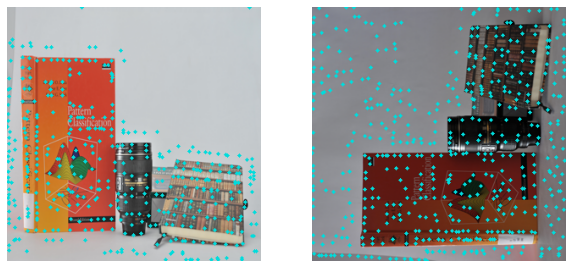

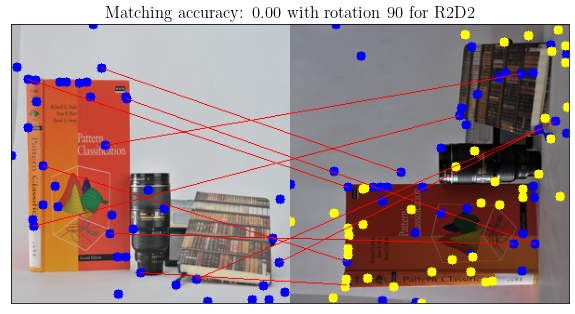

Generating qualitative results for i_duda 	::  50%|████▉     | 62/125 [00:04<00:05, 10.80it/s]

Image 4 with rotation 105
Image 4 with rotation 120
Image 4 with rotation 135
Image 4 with rotation 150
Image 4 with rotation 165
Image 4 with rotation 180


Generating qualitative results for i_duda 	::  52%|█████▏    | 65/125 [00:04<00:05, 11.68it/s]

Image 4 with rotation 195
Image 4 with rotation 210
Image 4 with rotation 225
Image 4 with rotation 240


Generating qualitative results for i_duda 	::  55%|█████▌    | 69/125 [00:04<00:05, 11.00it/s]

Image 4 with rotation 255
Image 4 with rotation 270
Image 4 with rotation 285
Image 4 with rotation 300
Image 4 with rotation 315

Generating qualitative results for i_duda 	::  58%|█████▊    | 73/125 [00:04<00:03, 15.05it/s]


Image 4 with rotation 330
Image 4 with rotation 345
Image 4 with rotation 360
Image 5 with rotation 0
Image 5 with rotation 15


Generating qualitative results for i_duda 	::  62%|██████▏   | 77/125 [00:05<00:02, 16.67it/s]

Image 5 with rotation 30
Image 5 with rotation 45


Generating qualitative results for i_duda 	::  67%|██████▋   | 84/125 [00:05<00:02, 17.31it/s]

Image 5 with rotation 60
Image 5 with rotation 75
Image 5 with rotation 90
Image 5 with rotation 105
Image 5 with rotation 120
Image 5 with rotation 135


Generating qualitative results for i_duda 	::  69%|██████▉   | 86/125 [00:05<00:02, 15.18it/s]

Image 5 with rotation 150
Image 5 with rotation 165
Image 5 with rotation 180
Image 5 with rotation 195
Image 5 with rotation 210
Image 5 with rotation 225


Generating qualitative results for i_duda 	::  75%|███████▌  | 94/125 [00:05<00:01, 22.75it/s]

Image 5 with rotation 240
Image 5 with rotation 255
Image 5 with rotation 270
Image 5 with rotation 285
Image 5 with rotation 300
Image 5 with rotation 315


Generating qualitative results for i_duda 	::  78%|███████▊  | 97/125 [00:06<00:01, 20.16it/s]

Image 5 with rotation 330
Image 5 with rotation 345
Image 5 with rotation 360


Generating qualitative results for i_duda 	::  82%|████████▏ | 103/125 [00:06<00:01, 17.17it/s]

Image 6 with rotation 0
Image 6 with rotation 15
Image 6 with rotation 30


Generating qualitative results for i_duda 	::  84%|████████▍ | 105/125 [00:06<00:01, 17.49it/s]

Image 6 with rotation 45
Image 6 with rotation 60
Image 6 with rotation 75
Image 6 with rotation 90
Image 6 with rotation 105


Generating qualitative results for i_duda 	::  90%|████████▉ | 112/125 [00:06<00:00, 20.40it/s]

Image 6 with rotation 120
Image 6 with rotation 135
Image 6 with rotation 150
Image 6 with rotation 165
Image 6 with rotation 180
Image 6 with rotation 195


Generating qualitative results for i_duda 	::  95%|█████████▌| 119/125 [00:07<00:00, 26.37it/s]

Image 6 with rotation 210
Image 6 with rotation 225
Image 6 with rotation 240
Image 6 with rotation 255
Image 6 with rotation 270
Image 6 with rotation 285
Image 6 with rotation 300
Image 6 with rotation 315


Generating qualitative results for i_duda 	:: 100%|██████████| 125/125 [00:07<00:00, 17.20it/s]


Image 6 with rotation 330
Image 6 with rotation 345
Image 6 with rotation 360
 Generating results for R2D2 - $C_{4}$ (Ep 4) for sequence /home/lcur1325/projects/rotation-equivariant-lfm/data/hpatches-sequences-release/i_duda 


Generating qualitative results for i_duda 	::   2%|▏         | 3/125 [00:00<00:05, 21.86it/s]

Image 2 with rotation 0
Image 2 with rotation 15
Image 2 with rotation 30
Image 2 with rotation 45
Image 2 with rotation 60
Image 2 with rotation 75
Image 2 with rotation 90


Generating qualitative results for i_duda 	::   9%|▉         | 11/125 [00:00<00:03, 34.07it/s]

Image 2 with rotation 105
Image 2 with rotation 120
Image 2 with rotation 135
Image 2 with rotation 150
Image 2 with rotation 165
Image 2 with rotation 180
Image 2 with rotation 195
Image 2 with rotation 210
Image 2 with rotation 225
Image 2 with rotation 240


Generating qualitative results for i_duda 	::  18%|█▊        | 23/125 [00:00<00:02, 48.38it/s]

Image 2 with rotation 255
Image 2 with rotation 270
Image 2 with rotation 285
Image 2 with rotation 300
Image 2 with rotation 315
Image 2 with rotation 330
Image 2 with rotation 345
Image 2 with rotation 360
Image 3 with rotation 0
Image 3 with rotation 15
Image 3 with rotation 30
Image 3 with rotation 45


Generating qualitative results for i_duda 	::  28%|██▊       | 35/125 [00:00<00:01, 53.50it/s]

Image 3 with rotation 60
Image 3 with rotation 75
Image 3 with rotation 90
Image 3 with rotation 105
Image 3 with rotation 120
Image 3 with rotation 135
Image 3 with rotation 150
Image 3 with rotation 165
Image 3 with rotation 180
Image 3 with rotation 195
Image 3 with rotation 210


Generating qualitative results for i_duda 	::  38%|███▊      | 47/125 [00:01<00:01, 45.50it/s]

Image 3 with rotation 225
Image 3 with rotation 240
Image 3 with rotation 255
Image 3 with rotation 270
Image 3 with rotation 285
Image 3 with rotation 300
Image 3 with rotation 315
Image 3 with rotation 330
Image 3 with rotation 345


Generating qualitative results for i_duda 	::  42%|████▏     | 52/125 [00:01<00:01, 45.71it/s]

Image 3 with rotation 360
Image 4 with rotation 0
Image 4 with rotation 15
Image 4 with rotation 30
Image 4 with rotation 45
Image 4 with rotation 60
Image 4 with rotation 75
Image 4 with rotation 90


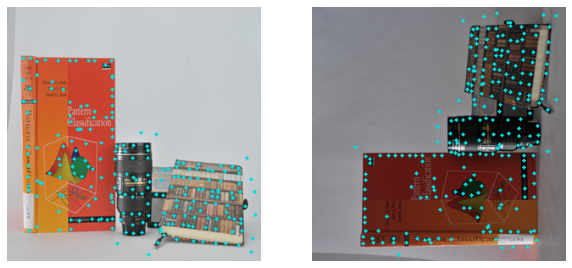

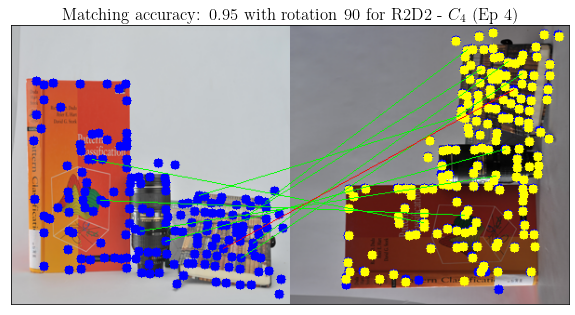

Generating qualitative results for i_duda 	::  55%|█████▌    | 69/125 [00:02<00:02, 24.47it/s]

Image 4 with rotation 105
Image 4 with rotation 120
Image 4 with rotation 135
Image 4 with rotation 150
Image 4 with rotation 165
Image 4 with rotation 180
Image 4 with rotation 195
Image 4 with rotation 210
Image 4 with rotation 225
Image 4 with rotation 240
Image 4 with rotation 255
Image 4 with rotation 270
Image 4 with rotation 285
Image 4 with rotation 300
Image 4 with rotation 315
Image 4 with rotation 330
Image 4 with rotation 345


Generating qualitative results for i_duda 	::  65%|██████▍   | 81/125 [00:02<00:01, 33.10it/s]

Image 4 with rotation 360
Image 5 with rotation 0
Image 5 with rotation 15
Image 5 with rotation 30
Image 5 with rotation 45
Image 5 with rotation 60
Image 5 with rotation 75
Image 5 with rotation 90
Image 5 with rotation 105
Image 5 with rotation 120


Generating qualitative results for i_duda 	::  74%|███████▍  | 93/125 [00:02<00:00, 41.59it/s]

Image 5 with rotation 135
Image 5 with rotation 150
Image 5 with rotation 165
Image 5 with rotation 180
Image 5 with rotation 195
Image 5 with rotation 210
Image 5 with rotation 225
Image 5 with rotation 240
Image 5 with rotation 255
Image 5 with rotation 270


Generating qualitative results for i_duda 	::  79%|███████▉  | 99/125 [00:02<00:00, 38.40it/s]

Image 5 with rotation 285
Image 5 with rotation 300
Image 5 with rotation 315
Image 5 with rotation 330
Image 5 with rotation 345
Image 5 with rotation 360
Image 6 with rotation 0
Image 6 with rotation 15
Image 6 with rotation 30
Image 6 with rotation 45


Generating qualitative results for i_duda 	::  87%|████████▋ | 109/125 [00:03<00:00, 35.01it/s]

Image 6 with rotation 60
Image 6 with rotation 75
Image 6 with rotation 90
Image 6 with rotation 105
Image 6 with rotation 120
Image 6 with rotation 135


Generating qualitative results for i_duda 	::  91%|█████████ | 114/125 [00:03<00:00, 37.19it/s]

Image 6 with rotation 150
Image 6 with rotation 165
Image 6 with rotation 180
Image 6 with rotation 195
Image 6 with rotation 210
Image 6 with rotation 225
Image 6 with rotation 240
Image 6 with rotation 255


Generating qualitative results for i_duda 	:: 100%|██████████| 125/125 [00:03<00:00, 35.25it/s]

Image 6 with rotation 270
Image 6 with rotation 285
Image 6 with rotation 300
Image 6 with rotation 315
Image 6 with rotation 330
Image 6 with rotation 345
Image 6 with rotation 360
 Generating results for R2D2 - $SO_{2}$ (Ep 4) for sequence /home/lcur1325/projects/rotation-equivariant-lfm/data/hpatches-sequences-release/i_duda 



Generating qualitative results for i_duda 	::   0%|          | 0/125 [00:00<?, ?it/s]

Image 2 with rotation 0
Image 2 with rotation 15


Generating qualitative results for i_duda 	::   6%|▌         | 7/125 [00:00<00:04, 26.26it/s]

Image 2 with rotation 30
Image 2 with rotation 45
Image 2 with rotation 60
Image 2 with rotation 75
Image 2 with rotation 90
Image 2 with rotation 105
Image 2 with rotation 120
Image 2 with rotation 135
Image 2 with rotation 150
Image 2 with rotation 165
Image 2 with rotation 180

Generating qualitative results for i_duda 	::  14%|█▍        | 18/125 [00:00<00:03, 32.50it/s]


Image 2 with rotation 195
Image 2 with rotation 210
Image 2 with rotation 225
Image 2 with rotation 240
Image 2 with rotation 255
Image 2 with rotation 270
Image 2 with rotation 285
Image 2 with rotation 300
Image 2 with rotation 315


Generating qualitative results for i_duda 	::  19%|█▉        | 24/125 [00:00<00:03, 31.94it/s]

Image 2 with rotation 330
Image 2 with rotation 345
Image 2 with rotation 360
Image 3 with rotation 0
Image 3 with rotation 15
Image 3 with rotation 30
Image 3 with rotation 45


Generating qualitative results for i_duda 	::  28%|██▊       | 35/125 [00:01<00:02, 41.59it/s]

Image 3 with rotation 60
Image 3 with rotation 75
Image 3 with rotation 90
Image 3 with rotation 105
Image 3 with rotation 120
Image 3 with rotation 135
Image 3 with rotation 150
Image 3 with rotation 165
Image 3 with rotation 180
Image 3 with rotation 195
Image 3 with rotation 210
Image 3 with rotation 225


Generating qualitative results for i_duda 	::  33%|███▎      | 41/125 [00:01<00:02, 37.12it/s]

Image 3 with rotation 240
Image 3 with rotation 255
Image 3 with rotation 270
Image 3 with rotation 285


Generating qualitative results for i_duda 	::  41%|████      | 51/125 [00:01<00:02, 27.04it/s]

Image 3 with rotation 300
Image 3 with rotation 315
Image 3 with rotation 330
Image 3 with rotation 345
Image 3 with rotation 360
Image 4 with rotation 0
Image 4 with rotation 15


Generating qualitative results for i_duda 	::  44%|████▍     | 55/125 [00:01<00:02, 28.15it/s]

Image 4 with rotation 30
Image 4 with rotation 45
Image 4 with rotation 60
Image 4 with rotation 75
Image 4 with rotation 90


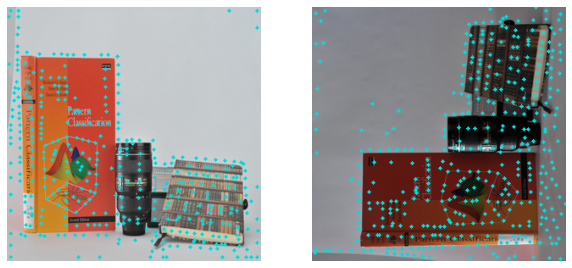

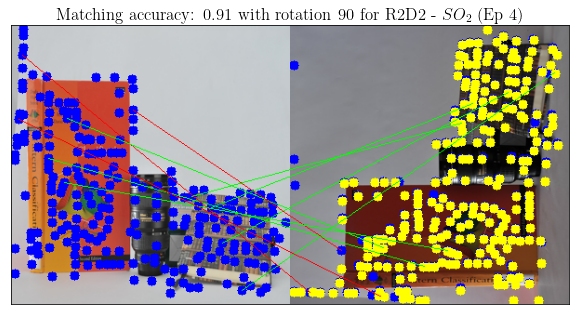

Generating qualitative results for i_duda 	::  56%|█████▌    | 70/125 [00:02<00:02, 20.32it/s]

Image 4 with rotation 105
Image 4 with rotation 120
Image 4 with rotation 135
Image 4 with rotation 150
Image 4 with rotation 165
Image 4 with rotation 180
Image 4 with rotation 195
Image 4 with rotation 210
Image 4 with rotation 225
Image 4 with rotation 240
Image 4 with rotation 255
Image 4 with rotation 270
Image 4 with rotation 285
Image 4 with rotation 300
Image 4 with rotation 315
Image 4 with rotation 330
Image 4 with rotation 345
Image 4 with rotation 360


Generating qualitative results for i_duda 	::  64%|██████▍   | 80/125 [00:03<00:01, 27.55it/s]

Image 5 with rotation 0
Image 5 with rotation 15
Image 5 with rotation 30
Image 5 with rotation 45
Image 5 with rotation 60
Image 5 with rotation 75
Image 5 with rotation 90
Image 5 with rotation 105
Image 5 with rotation 120


Generating qualitative results for i_duda 	::  68%|██████▊   | 85/125 [00:03<00:01, 30.84it/s]

Image 5 with rotation 135
Image 5 with rotation 150
Image 5 with rotation 165
Image 5 with rotation 180
Image 5 with rotation 195
Image 5 with rotation 210


Generating qualitative results for i_duda 	::  76%|███████▌  | 95/125 [00:03<00:00, 32.54it/s]

Image 5 with rotation 225
Image 5 with rotation 240
Image 5 with rotation 255
Image 5 with rotation 270
Image 5 with rotation 285
Image 5 with rotation 300
Image 5 with rotation 315
Image 5 with rotation 330


Generating qualitative results for i_duda 	::  84%|████████▍ | 105/125 [00:03<00:00, 34.42it/s]

Image 5 with rotation 345
Image 5 with rotation 360
Image 6 with rotation 0
Image 6 with rotation 15
Image 6 with rotation 30
Image 6 with rotation 45
Image 6 with rotation 60
Image 6 with rotation 75


Generating qualitative results for i_duda 	::  88%|████████▊ | 110/125 [00:03<00:00, 36.66it/s]

Image 6 with rotation 90
Image 6 with rotation 105
Image 6 with rotation 120
Image 6 with rotation 135
Image 6 with rotation 150
Image 6 with rotation 165
Image 6 with rotation 180


Generating qualitative results for i_duda 	::  95%|█████████▌| 119/125 [00:04<00:00, 34.01it/s]

Image 6 with rotation 195
Image 6 with rotation 210
Image 6 with rotation 225
Image 6 with rotation 240
Image 6 with rotation 255
Image 6 with rotation 270
Image 6 with rotation 285
Image 6 with rotation 300


Generating qualitative results for i_duda 	:: 100%|██████████| 125/125 [00:04<00:00, 28.30it/s]

Image 6 with rotation 315
Image 6 with rotation 330
Image 6 with rotation 345
Image 6 with rotation 360
 Generating results for R2D2 - $C_{8}$ (Ep 4) for sequence /home/lcur1325/projects/rotation-equivariant-lfm/data/hpatches-sequences-release/i_duda 



Generating qualitative results for i_duda 	::   2%|▏         | 3/125 [00:00<00:06, 20.22it/s]

Image 2 with rotation 0
Image 2 with rotation 15
Image 2 with rotation 30
Image 2 with rotation 45
Image 2 with rotation 60


Generating qualitative results for i_duda 	::  10%|▉         | 12/125 [00:00<00:03, 36.57it/s]

Image 2 with rotation 75
Image 2 with rotation 90
Image 2 with rotation 105
Image 2 with rotation 120
Image 2 with rotation 135
Image 2 with rotation 150
Image 2 with rotation 165
Image 2 with rotation 180
Image 2 with rotation 195
Image 2 with rotation 210


Generating qualitative results for i_duda 	::  18%|█▊        | 23/125 [00:00<00:02, 36.56it/s]

Image 2 with rotation 225
Image 2 with rotation 240
Image 2 with rotation 255
Image 2 with rotation 270
Image 2 with rotation 285
Image 2 with rotation 300
Image 2 with rotation 315
Image 2 with rotation 330
Image 2 with rotation 345


Generating qualitative results for i_duda 	::  22%|██▏       | 27/125 [00:00<00:02, 36.63it/s]

Image 2 with rotation 360
Image 3 with rotation 0
Image 3 with rotation 15
Image 3 with rotation 30
Image 3 with rotation 45
Image 3 with rotation 60
Image 3 with rotation 75
Image 3 with rotation 90
Image 3 with rotation 105


Generating qualitative results for i_duda 	::  31%|███       | 39/125 [00:01<00:02, 39.82it/s]

Image 3 with rotation 120
Image 3 with rotation 135
Image 3 with rotation 150
Image 3 with rotation 165
Image 3 with rotation 180
Image 3 with rotation 195
Image 3 with rotation 210
Image 3 with rotation 225
Image 3 with rotation 240


Generating qualitative results for i_duda 	::  35%|███▌      | 44/125 [00:01<00:02, 27.75it/s]

Image 3 with rotation 255
Image 3 with rotation 270
Image 3 with rotation 285
Image 3 with rotation 300


Generating qualitative results for i_duda 	::  38%|███▊      | 48/125 [00:01<00:02, 25.78it/s]

Image 3 with rotation 315
Image 3 with rotation 330
Image 3 with rotation 345
Image 3 with rotation 360
Image 4 with rotation 0


Generating qualitative results for i_duda 	::  42%|████▏     | 52/125 [00:01<00:03, 23.90it/s]

Image 4 with rotation 15
Image 4 with rotation 30
Image 4 with rotation 45
Image 4 with rotation 60
Image 4 with rotation 75
Image 4 with rotation 90


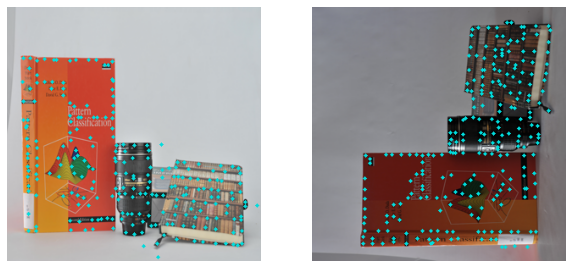

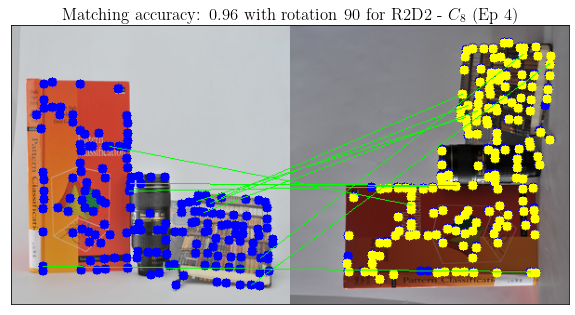

Generating qualitative results for i_duda 	::  54%|█████▍    | 68/125 [00:02<00:02, 19.72it/s]

Image 4 with rotation 105
Image 4 with rotation 120
Image 4 with rotation 135
Image 4 with rotation 150
Image 4 with rotation 165
Image 4 with rotation 180
Image 4 with rotation 195
Image 4 with rotation 210
Image 4 with rotation 225
Image 4 with rotation 240
Image 4 with rotation 255
Image 4 with rotation 270
Image 4 with rotation 285
Image 4 with rotation 300
Image 4 with rotation 315
Image 4 with rotation 330
Image 4 with rotation 345


Generating qualitative results for i_duda 	::  64%|██████▍   | 80/125 [00:03<00:01, 28.71it/s]

Image 4 with rotation 360
Image 5 with rotation 0
Image 5 with rotation 15
Image 5 with rotation 30
Image 5 with rotation 45
Image 5 with rotation 60
Image 5 with rotation 75
Image 5 with rotation 90


Generating qualitative results for i_duda 	::  68%|██████▊   | 85/125 [00:03<00:01, 27.76it/s]

Image 5 with rotation 105
Image 5 with rotation 120
Image 5 with rotation 135
Image 5 with rotation 150
Image 5 with rotation 165
Image 5 with rotation 180
Image 5 with rotation 195
Image 5 with rotation 210


Generating qualitative results for i_duda 	::  77%|███████▋  | 96/125 [00:03<00:00, 36.61it/s]

Image 5 with rotation 225
Image 5 with rotation 240
Image 5 with rotation 255
Image 5 with rotation 270
Image 5 with rotation 285
Image 5 with rotation 300
Image 5 with rotation 315
Image 5 with rotation 330
Image 5 with rotation 345
Image 5 with rotation 360
Image 6 with rotation 0
Image 6 with rotation 15


Generating qualitative results for i_duda 	::  87%|████████▋ | 109/125 [00:03<00:00, 40.71it/s]

Image 6 with rotation 30
Image 6 with rotation 45
Image 6 with rotation 60
Image 6 with rotation 75
Image 6 with rotation 90
Image 6 with rotation 105
Image 6 with rotation 120
Image 6 with rotation 135
Image 6 with rotation 150
Image 6 with rotation 165
Image 6 with rotation 180
Image 6 with rotation 195
Image 6 with rotation 210


Generating qualitative results for i_duda 	::  97%|█████████▋| 121/125 [00:03<00:00, 46.55it/s]

Image 6 with rotation 225
Image 6 with rotation 240
Image 6 with rotation 255
Image 6 with rotation 270
Image 6 with rotation 285
Image 6 with rotation 300
Image 6 with rotation 315
Image 6 with rotation 330
Image 6 with rotation 345


Generating qualitative results for i_duda 	:: 100%|██████████| 125/125 [00:04<00:00, 30.87it/s]


Image 6 with rotation 360
 Generating results for R2D2 - $SO_{2}$ (Ep 18) for sequence /home/lcur1325/projects/rotation-equivariant-lfm/data/hpatches-sequences-release/i_duda 


Generating qualitative results for i_duda 	::   6%|▌         | 7/125 [00:00<00:02, 51.60it/s]

Image 2 with rotation 0
Image 2 with rotation 15
Image 2 with rotation 30
Image 2 with rotation 45
Image 2 with rotation 60
Image 2 with rotation 75
Image 2 with rotation 90
Image 2 with rotation 105
Image 2 with rotation 120
Image 2 with rotation 135
Image 2 with rotation 150


Generating qualitative results for i_duda 	::  15%|█▌        | 19/125 [00:00<00:02, 41.19it/s]

Image 2 with rotation 165
Image 2 with rotation 180
Image 2 with rotation 195
Image 2 with rotation 210
Image 2 with rotation 225
Image 2 with rotation 240
Image 2 with rotation 255
Image 2 with rotation 270


Generating qualitative results for i_duda 	::  19%|█▉        | 24/125 [00:00<00:02, 33.67it/s]

Image 2 with rotation 285
Image 2 with rotation 300
Image 2 with rotation 315
Image 2 with rotation 330
Image 2 with rotation 345
Image 2 with rotation 360


Generating qualitative results for i_duda 	::  22%|██▏       | 28/125 [00:00<00:02, 33.80it/s]

Image 3 with rotation 0
Image 3 with rotation 15
Image 3 with rotation 30
Image 3 with rotation 45
Image 3 with rotation 60


Generating qualitative results for i_duda 	::  28%|██▊       | 35/125 [00:01<00:03, 23.70it/s]

Image 3 with rotation 75
Image 3 with rotation 90
Image 3 with rotation 105
Image 3 with rotation 120
Image 3 with rotation 135
Image 3 with rotation 150


Generating qualitative results for i_duda 	::  30%|███       | 38/125 [00:01<00:03, 24.66it/s]

Image 3 with rotation 165
Image 3 with rotation 180
Image 3 with rotation 195
Image 3 with rotation 210
Image 3 with rotation 225
Image 3 with rotation 240
Image 3 with rotation 255


Generating qualitative results for i_duda 	::  38%|███▊      | 48/125 [00:01<00:02, 30.41it/s]

Image 3 with rotation 270
Image 3 with rotation 285
Image 3 with rotation 300
Image 3 with rotation 315
Image 3 with rotation 330
Image 3 with rotation 345
Image 3 with rotation 360
Image 4 with rotation 0
Image 4 with rotation 15


Generating qualitative results for i_duda 	::  45%|████▍     | 56/125 [00:01<00:02, 24.74it/s]

Image 4 with rotation 30
Image 4 with rotation 45
Image 4 with rotation 60
Image 4 with rotation 75
Image 4 with rotation 90


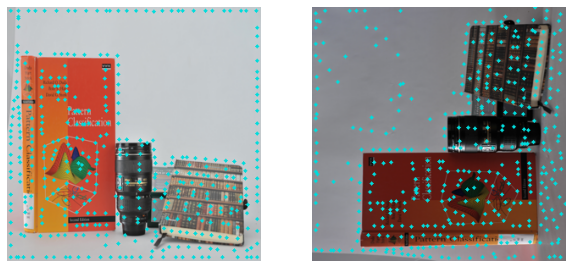

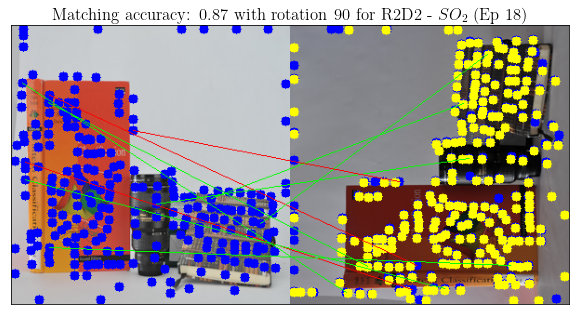

Generating qualitative results for i_duda 	::  49%|████▉     | 61/125 [00:03<00:06,  9.40it/s]

Image 4 with rotation 105
Image 4 with rotation 120
Image 4 with rotation 135
Image 4 with rotation 150
Image 4 with rotation 165


Generating qualitative results for i_duda 	::  54%|█████▍    | 68/125 [00:03<00:04, 13.97it/s]

Image 4 with rotation 180
Image 4 with rotation 195
Image 4 with rotation 210
Image 4 with rotation 225
Image 4 with rotation 240
Image 4 with rotation 255
Image 4 with rotation 270


Generating qualitative results for i_duda 	::  58%|█████▊    | 72/125 [00:03<00:03, 17.61it/s]

Image 4 with rotation 285
Image 4 with rotation 300
Image 4 with rotation 315
Image 4 with rotation 330
Image 4 with rotation 345
Image 4 with rotation 360


Generating qualitative results for i_duda 	::  62%|██████▏   | 78/125 [00:03<00:02, 21.43it/s]

Image 5 with rotation 0
Image 5 with rotation 15
Image 5 with rotation 30
Image 5 with rotation 45
Image 5 with rotation 60
Image 5 with rotation 75
Image 5 with rotation 90


Generating qualitative results for i_duda 	::  66%|██████▌   | 82/125 [00:03<00:01, 25.29it/s]

Image 5 with rotation 105
Image 5 with rotation 120
Image 5 with rotation 135


Generating qualitative results for i_duda 	::  73%|███████▎  | 91/125 [00:04<00:01, 25.26it/s]

Image 5 with rotation 150
Image 5 with rotation 165
Image 5 with rotation 180
Image 5 with rotation 195
Image 5 with rotation 210
Image 5 with rotation 225
Image 5 with rotation 240
Image 5 with rotation 255


Generating qualitative results for i_duda 	::  76%|███████▌  | 95/125 [00:04<00:01, 23.92it/s]

Image 5 with rotation 270
Image 5 with rotation 285
Image 5 with rotation 300
Image 5 with rotation 315
Image 5 with rotation 330

Generating qualitative results for i_duda 	::  82%|████████▏ | 102/125 [00:04<00:00, 27.95it/s]


Image 5 with rotation 345
Image 5 with rotation 360
Image 6 with rotation 0
Image 6 with rotation 15
Image 6 with rotation 30
Image 6 with rotation 45
Image 6 with rotation 60


Generating qualitative results for i_duda 	::  88%|████████▊ | 110/125 [00:04<00:00, 28.84it/s]

Image 6 with rotation 75
Image 6 with rotation 90
Image 6 with rotation 105
Image 6 with rotation 120
Image 6 with rotation 135
Image 6 with rotation 150


Generating qualitative results for i_duda 	::  94%|█████████▍| 118/125 [00:05<00:00, 32.27it/s]

Image 6 with rotation 165
Image 6 with rotation 180
Image 6 with rotation 195
Image 6 with rotation 210
Image 6 with rotation 225
Image 6 with rotation 240
Image 6 with rotation 255
Image 6 with rotation 270


Generating qualitative results for i_duda 	:: 100%|██████████| 125/125 [00:05<00:00, 23.35it/s]

Image 6 with rotation 285
Image 6 with rotation 300
Image 6 with rotation 315
Image 6 with rotation 330
Image 6 with rotation 345
Image 6 with rotation 360


In [22]:
# results = dict()

# load image sequences
sequences = sorted(glob(join(data_dir, "*")))

# select a random sequence to plot results
sequence = np.random.choice(sequences)

# load rotation values between 0 and 360 degrees
rotations = np.arange(0, 360 + 1, gap_between_rotations, dtype=int)
rotation_to_visualize = 90

# set a (list of) pixel threshold value across which to evaluate rotation robustness
thresholds = [3.]

# set this to true to see intermediate outputs/messages
verbose = True

for model_name, model_ckpt_path in model_ckpt_paths.items():

    # save directory
    save_dir = configure_save_dir(output_dir, model_ckpt_path, dataset_name="hpatches")

#     metrics_path = join(save_dir, "metrics.pt")
#     if exists(metrics_path):
#         print_update(f"Loading cached results for {model_name}")
#         results[model_name] = torch.load(metrics_path)["MMA"]
#         continue

    print_update(f"Generating results for {model_name} for sequence {sequence}")

#     # computing Mean Matching Accuracy (MMA)
#     mma = defaultdict(list)

#     counter = 1

    # set path to the source image
    img1_path = join(sequence, "1.ppm")
    img1 = Image.open(img1_path)
    if downsize:
        img1 = img1.resize((imsize, imsize))

    # load outputs for source image
    sequence_name = os.path.basename(sequence)
    save_path = join(save_dir, sequence_name, "1.npy")
    img1_outputs = np.load(save_path, allow_pickle=True).item()

    # possible indices of the target images
    img2_indices = np.arange(2, 7)

    # load all target images at once
    img2s = [Image.open(join(sequence, f"{i}.ppm")) for i in img2_indices]
    if downsize:
        img2s = [img2.resize((imsize, imsize)) for img2 in img2s]

    # load all homographies
    # NOTE that this is not needed since we save the apt H within outputs itself

    rotation_grid, img2_indices_grid  = np.meshgrid(rotations, img2_indices)
    rotation_grid, img2_indices_grid = rotation_grid.flatten(), img2_indices_grid.flatten()

    iterator = tqdm_iterator(
        range(len(rotation_grid)),
        desc=f"Generating qualitative results for {sequence_name} \t:",
    )
    for i in iterator:
        rotation, img2_index = rotation_grid[i], img2_indices_grid[i]

        if verbose:
            print(f"Image {img2_index} with rotation {rotation}")

        img2 = img2s[img2_index - 2]
        img2_rotated = img2.rotate(rotation)

        save_path = join(save_dir, sequence_name, f"{img2_index}_rotation_{rotation}.npy")
        img2_outputs = np.load(save_path, allow_pickle=True).item()

        # get keypoints and descriptors from the outputs
        kps1 = img1_outputs["keypoints"]
        des1 = img1_outputs["descriptors"]

        kps2 = img2_outputs["keypoints"]
        des2 = img2_outputs["descriptors"]
        H = img2_outputs["H"]

        # show detected keypoints
        if verbose and rotation == rotation_to_visualize and img2_index == 4:
            show_images_with_keypoints([img1, img2_rotated], [kps1, kps2], radius=2)

        # perform matching
        width, height = img2.size
        result = evaluate_matching_with_rotation(
            kp1=kps1,
            des1=des1,
            kp2=kps2,
            des2=des2,
            H=H,
            width=width,
            height=height,
            rotation=rotation,
            return_metadata=True,
            threshold=3.,
        )

        # show matching results
        if verbose and rotation == rotation_to_visualize and img2_index == 4:
            analyze_result(img1, img2_rotated, result, K=10, radius=5, model_name=model_name)

#         # compute accuracy across various thresholds
#         _match_accu = []
#         for threshold in thresholds:
#             _match_accu.append(np.mean(result["distances"] < threshold))

#         mma[rotation].append(np.mean(_match_accu))

#     counter += 1

#     # compute the mean matching accuracy (MMA) for every rotation value
#     mma_avg = {k:np.array(mma[k]).mean() for k in mma}
#     # save metrics
#     metrics = {
#         "MMA": mma_avg,
#     }
#     torch.save(metrics, metrics_path)
    
#     # collect results
#     results[model_name] = mma_avg